# **TABLE OF CONTENTS**



> **1.   Introduction tool: SMS-TOOLs**

> **2.   Install SMS-TOOLs**

> **3.   Preparing for record singing voice**

> **4.   Experiment on the speech**

> **5.   Speaker Recognition**

> **6.   Voice Conversion**

> **7.   Speech Recognition**

> **8.   Conclusion**



# **1.   Introduction tool: SMS-TOOLS**






> SMS-tools is a Python-based toolkit designed for analyzing and processing audio signals, especially in music and speech. This open-source package provides a user-friendly interface and a range of tools for tasks like feature extraction, signal processing, and advanced algorithms. It's perfect for tasks like music information retrieval, speech recognition, and audio synthesis, making it suitable for both beginners and experts in audio processing.






# **2.   Install SMS-TOOLS**


> Step 1: install python 3.* (recommended 3.10) and the following modules: ipython, numpy, matplotlib, scipy, and cython by running the code below.


In [ ]:
%cd /Users/yoohyra/Desktop

/Users/yoohyra/Desktop


In [ ]:
pip install ipython numpy matplotlib scipy cython

Note: you may need to restart the kernel to use updated packages.




> Step 2: Download the whole package on Github then compile some C functions. For that we should go to the directory software/models/utilFunctions_C and type:






In [ ]:
%cd sms-tools-master/software/models/utilFunctions_C

/Users/yoohyra/Desktop/sms-tools-master/software/models/utilFunctions_C


In [ ]:
%%bash
python compileModule.py build_ext --inplace

running build_ext
skipping 'cutilFunctions.c' Cython extension (up-to-date)




> Step 3: To execute the models GUI you have to go to the directory software/models_interface and type like cell below.





In [ ]:
%cd ..

/Users/yoohyra/Desktop/sms-tools-master/software/models


In [ ]:
%cd ..

/Users/yoohyra/Desktop/sms-tools-master/software


In [ ]:
%cd models_interface

/Users/yoohyra/Desktop/sms-tools-master/software/models_interface


In [ ]:
%%bash
#python models_GUI.py


There return this when we run the code:



![](https://drive.google.com/uc?export=view&id=1t62ngfcZ5Cxw2kAQtE-zgzx7Yv3xAUF-)




> Step 4: To execute the transformations GUI that calls various sound transformation functions go to the directory software/transformations_interface and type like cells below





In [408]:
%cd ..

/Users/yoohyra/Desktop/sms-tools-master/software


In [399]:
%cd transformations_interface

/Users/yoohyra/Desktop/sms-tools-master/software/transformations_interface


In [367]:
%%bash
python transformations_GUI.py

There return this when we run the code:

![](https://drive.google.com/uc?export=view&id=1QKe8WPDaaYg6o00lUEj8JR6WqbUvFDhF)


# **3.   Preparing for record singing voice**

In [ ]:
pip install sounddevice

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install wavio

Note: you may need to restart the kernel to use updated packages.


In [368]:
# import required libraries
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv
import numpy as np
import os
from scipy.io import wavfile
import wave
import matplotlib.pyplot as plt

In [ ]:
def record_singing_voice() -> np.ndarray:
  """
  This function is used to record voice

  input:
    audio data

  output:
    WAV_file(np.ndarray): the recording file
  """
  # Sampling frequency
  fs= 44100

  # The path is used to save the recording file
  path = "/Users/yoohyra/Desktop/SpeechProcessing"

  # The time duration is taken to record an audio
  second = 10
  print("Recording.....")

  # Record audio for the given number of seconds
  record_voice = sd.rec( int ( second * fs ) , samplerate = fs , channels = 1, dtype='int16' )

  # Check whether the recording is finished
  sd.wait()

  # Join path with file name
  name = os.path.join(path, "singing_voice.wav")

  # Write the output into a file
  write(name,fs,record_voice)
  print("Finished..... ")
  print("Please check your output file in ", name)

  return name, record_voice



In [ ]:
#saved_file, voice = record_singing_voice()

In [ ]:
pip install playsound

  Preparing metadata (setup.py) ... - done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=eb0f46dbcd4a1f25d941c08f98af3f44424f3869a1aab00999097a98d25fd72f
  Stored in directory: /Users/yoohyra/Library/Caches/pip/wheels/ba/39/54/c8f7ff9a88a644d3c58b4dec802d90b79a2e0fb2a6b884bf82
Successfully built playsound
Note: you may need to restart the kernel to use updated packages.


In [541]:
# import required module
from playsound import playsound

# for playing note.wav file
playsound('/Users/yoohyra/Desktop/SpeechProcessing/singing_voice.wav')


# **4.   Demonstrate all the functionalities**

##4.1 STFT Morph

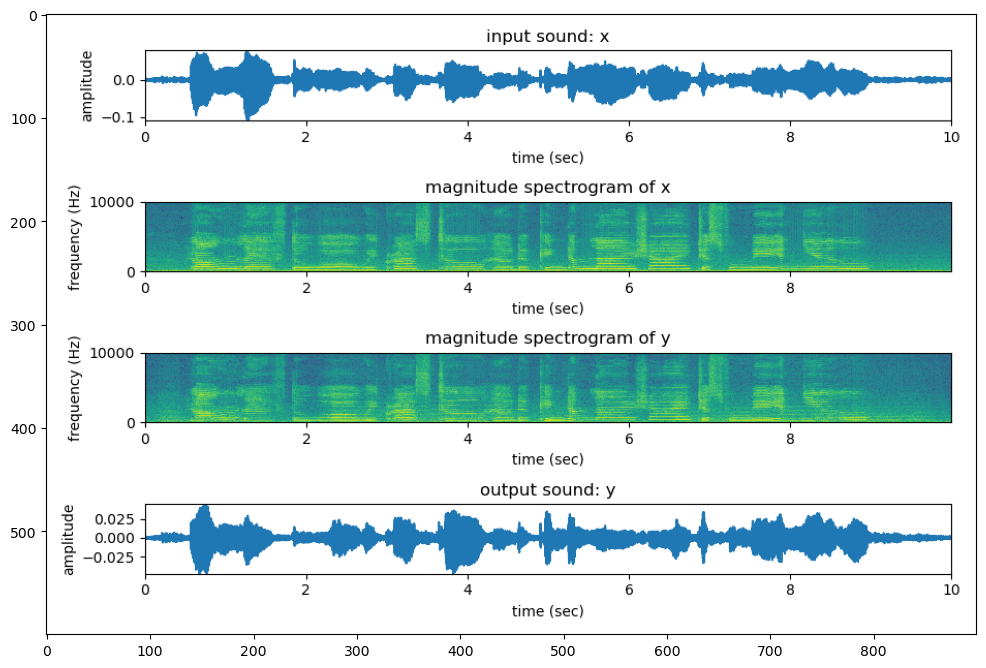

In [569]:
os.chdir('/Users/yoohyra/Desktop/SpeechProcessing/images')
img = plt.imread('STFT_Morph_trans.png')
plt.figure(figsize=(12, 15))
plt.imshow(img)



> **Function**


```
# perform morphing
y = STFTT.stftMorph(x1: np.ndarray, x2: np.ndarray, fs: float, w1: np.ndarray, N1: int,
                w2: np.ndarray, N2: int, H1: int, smoothf: float, balancef: float) -> np.ndarray

# compute the magnitude and phase spectrogram of input sound (for plotting)
mX1, pX1 = STFT.stftAnal(x1: np.ndarray, w1: np.ndarray, N1: int, H1: int) -> np.ndarray

# compute the magnitude and phase spectrogram of output sound (for plotting)
mY, pY = STFT.stftAnal(y: np.ndarray, w1: np.ndarray, N1: int, H1: int) -> np.ndarray
```



> **Self-experience**
  
  - I chose 2 sound, one was my singing voice and another was random sound from the tool. It had 2 variables, which I could adjust, was Smooth factor and Balance factor. These 2 control the smooth of sound 2 and the balance of 2 sound when play it together. After choosing, the output is 2 sound playing parallel and I saw the sound was not very smooth as I aspected.




> **Objective:**

  - The function **stftMorph** is designed to perform morphing between two sounds using the Short-Time Fourier Transform (STFT), allowing for creative audio transformations with control over the smoothness of the transition and the balance between the two input sounds. This function return morphed sound.

  - The function **stftAnal** is used in signal processing and audio analysis to understand the frequency content of a signal as it changes over time. This function return the magnitude and phase spectra.

   

> **Parameters:**


    
  1. fs (float):
    - Description: sampling rate

  2. w1, w2 (np.ndarray):
    - Description: analysis windows, which are a mathematical function applied to each frame of the input signal before performing
  the Short-Time Fourier Transform (STFT). It helps reduce spectral leakage and artifacts caused by the abrupt start and end of frames.

  3. N1, N2 (int):
    - Description: The FFT size is the number of points used in the Fast Fourier Transform (FFT) algorithm,
  which is applied to each frame of the signal during the STFT.
    
  4. H1 (int):
    - Description: The hop size is the number of samples between the starting points of consecutive frames in the STFT analysis.
    
  5. smoothf (float):
    - Description: The smooth factor (smoothf) is a parameter used to control the smoothness of the spectrum of the second sound (x2),
  usually bigger than 0 to max of 1, where 1 is no smothing.
    
  6. balancef (float):
    - Description: The balance factor (balancef) is a parameter used to control the balance between the two sounds (x1 and x2), usually from 0 to 1, where 0 is sound 1 and 1 is sound 2.

  7. mX1, mY (np.ndarray):
    - Description: It contains the magnitudes of the frequency components obtained through the STFT analysis for each frame of the input sound.

  8. pX1, pY (np.ndarray):
    - Description: It contains the phase information of the frequency components obtained through the STFT analysis for each frame of the input sound.

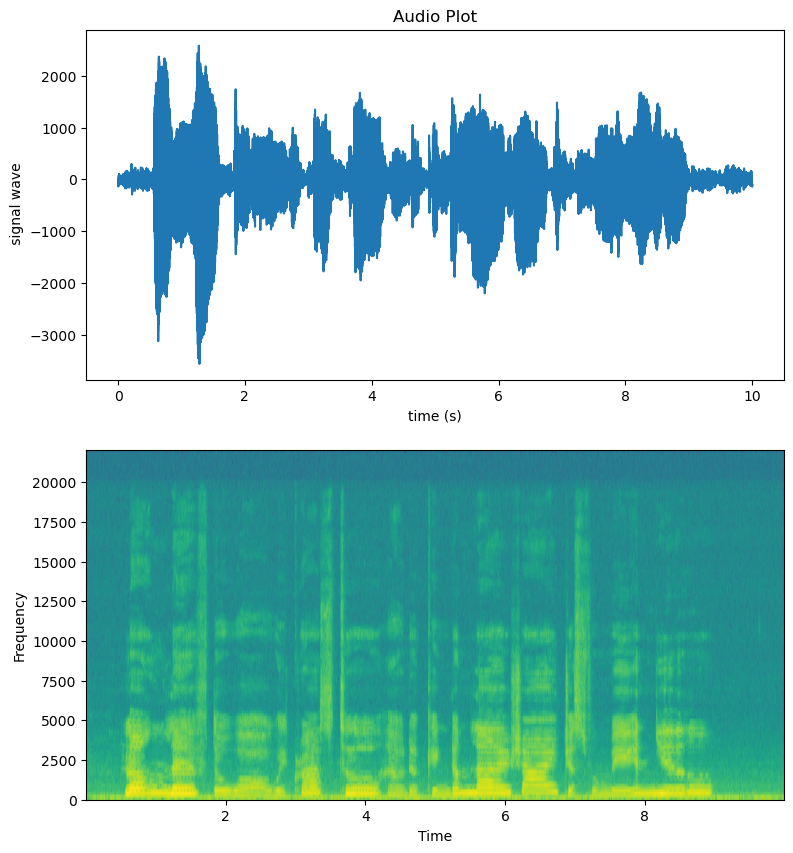

In [ ]:
#import the pyplot and wavfile modules

import matplotlib.pyplot as plt

# Read the wav file (mono)
obj = wave.open('/Users/yoohyra/Desktop/SpeechProcessing/singing_voice.wav','rb')

sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)
duration = n_samples/sample_freq
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
time = np.linspace(0, duration, num=n_samples)

plt.figure(figsize=(9, 10))

plt.subplot(211)
plt.plot(time, signal_array)
plt.title('Audio Plot')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')

plt.subplot(212)
plt.specgram(signal_array,Fs=sample_freq)
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()


## 4.2 Sine

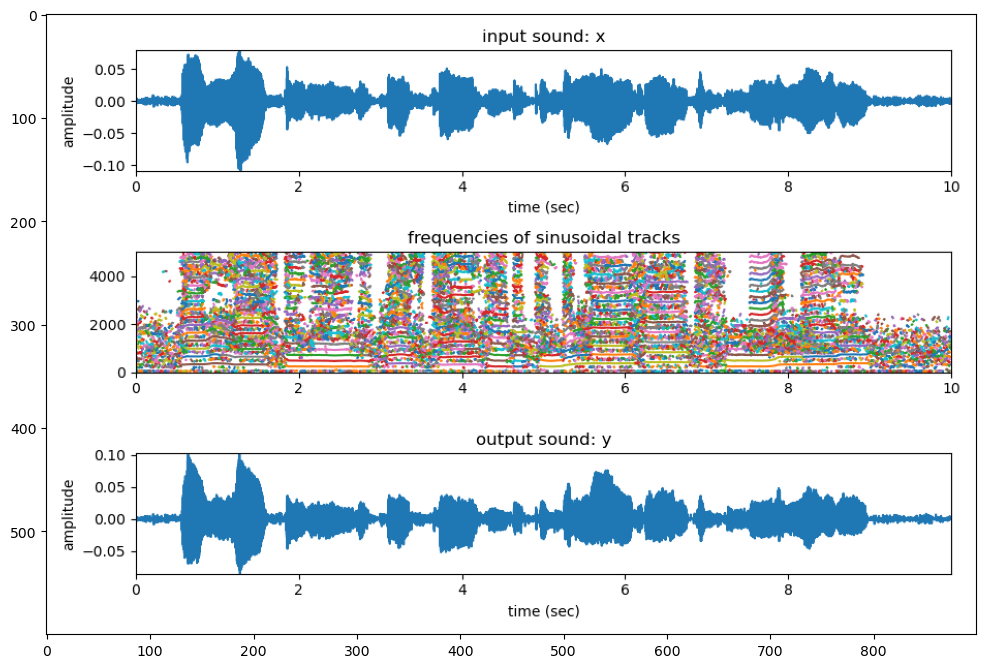

In [570]:
os.chdir('/Users/yoohyra/Desktop/SpeechProcessing/images')
img = plt.imread('Figure_1.png')
plt.figure(figsize=(12, 15))
plt.imshow(img)



> After applying transformation:



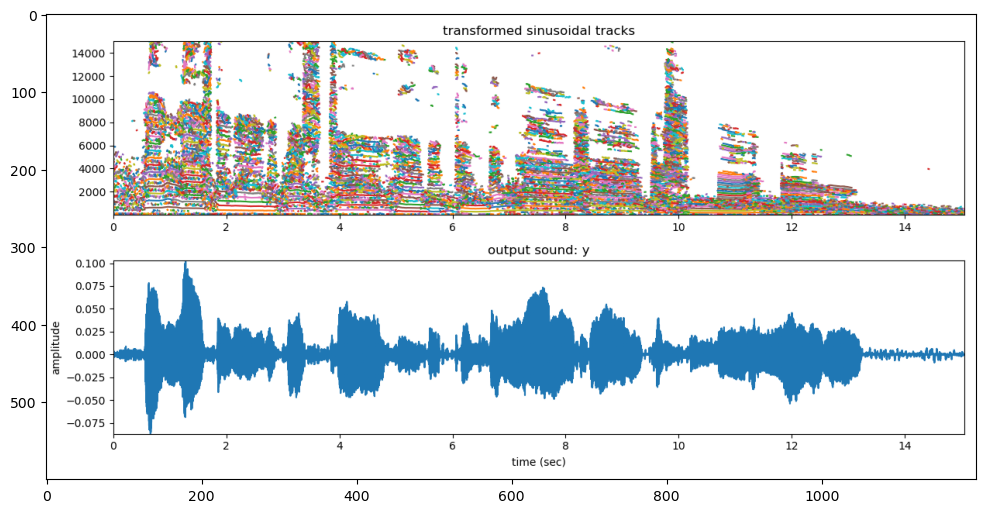

In [571]:
os.chdir('/Users/yoohyra/Desktop/SpeechProcessing/images')
img = plt.imread('Figure_1_trans.png')
plt.figure(figsize=(12, 15))
plt.imshow(img)



> **Function**


```
# compute the sine model of the whole sound
tfreq, tmag, tphase = SM.sineModelAnal(x: np.ndarray, fs: float, w: np.ndarray, N: int, H: int, t: float, maxnSines: int, minSineDur: float, freqDevOffset: int, freqDevSlope: float) -> np.ndarray

# synthesize the sines without original phases
y = SM.sineModelSynth(tfreq: np.ndarray, tmag: np.ndarray, tphase: np.ndarray, Ns: int, H: int, fs: float)
```



> **Self-experience**
  
  - I insert my singing sound. The Sine section has two parts: analysis/synthesis and apply transformation. If you want to apply transformation, you must press analysis/synthesis first.
  - When selecting analysis/synthesis, the output will have an additional running sound, which sounds like a running engine.
  - When I choose apply transformation, what I get sounds like the voice is muffled and it will go from high to low tones. There is a section in the middle that slows down and lengthens.




> **Objective:**

  - The **sineModelAnal** function is used for analyzing a sound signal using a sinusoidal model with sine tracking. It identifies and tracks sinusoidal components in the input signal, providing information about their frequencies, magnitudes, and phases. This analysis is valuable for tasks such as sound synthesis, pitch estimation, and source separation in audio processing applications.

  - The **sineModelSynth** function is used for synthesizing a sound signal based on the sinusoidal model parameters obtained from the analysis. Given sinusoidal frequencies, magnitudes, and phases, along with other synthesis parameters such as FFT size and hop size, the function generates a reconstructed signal that represents the original sound.

   

> **Parameters:**


  * In function **sineModelAnal**:
  1. x (NumPy array): input array sound

  2. fs (float):  sampling rate

  3. w (NumPy array): analysis window

  4. N (int): size of the complex spectrum

  5. H (int): hop-size

  6. t (float): threshold in negative dB

  7. maxnSines (int): maximum number of sines per frame, default value is 100

  8. minSineDur (float): minimum duration of sines in seconds, default value is 0.01

  9. freqDevOffset (int): minimum frequency deviation at 0Hz, default value is 20

  10. freqDevSlope (float): slope increase of minimum frequency deviation, default value is 0.01

  * In function **sineModelSynth**:
  11. tfreq (NumPy array): frequencies of sinusoids over time

  12. tmag (NumPy array): magnitudes of sinusoids over time

  13. tphase (NumPy array): phases of sinusoids over time

  14. N (int): synthesis FFT size

  15. H (int): hop size

  16. fs (float): sampling rate

In [ ]:
pip install librosa matplotlib

In [ ]:
pip install aubio

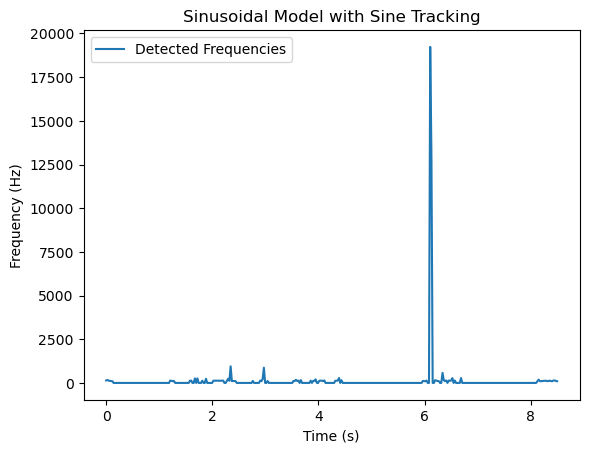

In [ ]:
import numpy as np
import soundfile as sf
import aubio
import matplotlib.pyplot as plt

def analyze_sound(input_file):
    # Load the sound file
    sound_data, sample_rate = sf.read(input_file)

    # Create aubio pitch object
    pitch_o = aubio.pitch("yin", 2048, 1024, sample_rate)

    # Create a list to store detected frequencies
    detected_frequencies = []

    # Process audio frames
    frame_size = 1024
    for i in range(0, len(sound_data) - frame_size + 1, frame_size):
        samples = sound_data[i:i+frame_size].astype('float32')  # Convert to float32
        pitch = pitch_o(samples)[0]

        # Convert pitch to frequency
        if pitch != 0:
            frequency = pitch_to_frequency(pitch)
            detected_frequencies.append(frequency)

    return detected_frequencies

def pitch_to_frequency(pitch):
    # Convert pitch to frequency using aubio's pitch2freq
    return aubio.miditofreq(pitch)

def plot_frequencies(detected_frequencies, sample_rate):
    # Convert time to seconds
    time = np.arange(0, len(detected_frequencies)) * 1024 / sample_rate

    # Plot the frequencies
    plt.plot(time, detected_frequencies, label='Detected Frequencies')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Sinusoidal Model with Sine Tracking')
    plt.legend()
    plt.show()

def main(input_file):
    detected_frequencies = analyze_sound(input_file)
    plot_frequencies(detected_frequencies, 44100)  # Assuming a sample rate of 44.1 kHz

if __name__ == "__main__":
    input_file = '/Users/yoohyra/Desktop/SpeechProcessing/singing_voice.wav'
    main(input_file)


## 4.3 Harmonic

> Speech analysis and synthesis method: **Harmonic**

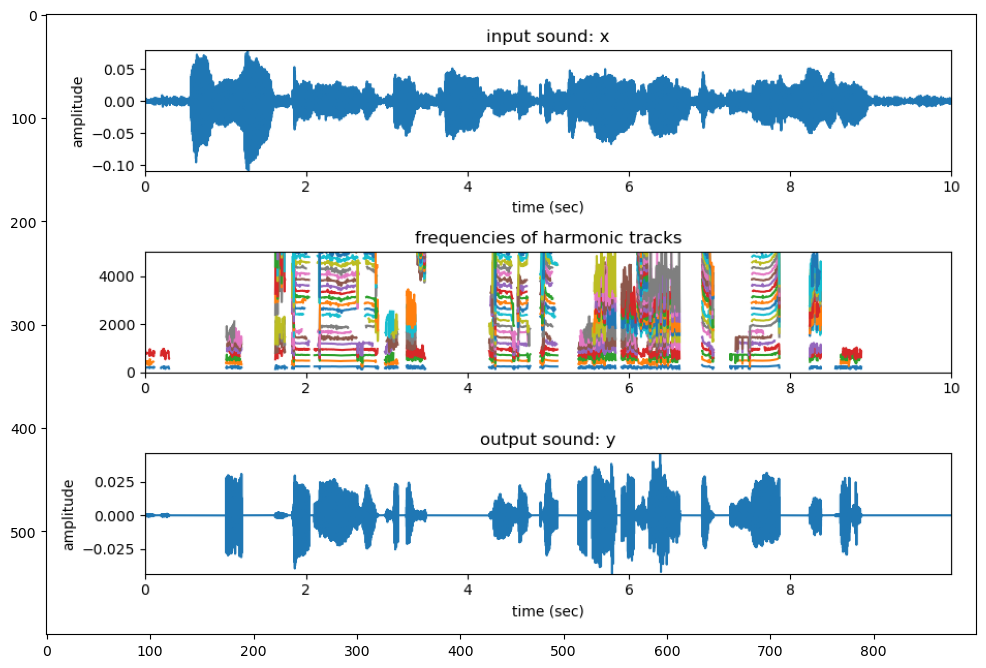

In [572]:
os.chdir('/Users/yoohyra/Desktop/SpeechProcessing/images')
img = plt.imread('Figure_2.png')
plt.figure(figsize=(12, 15))
plt.imshow(img)

> After applying transformation:

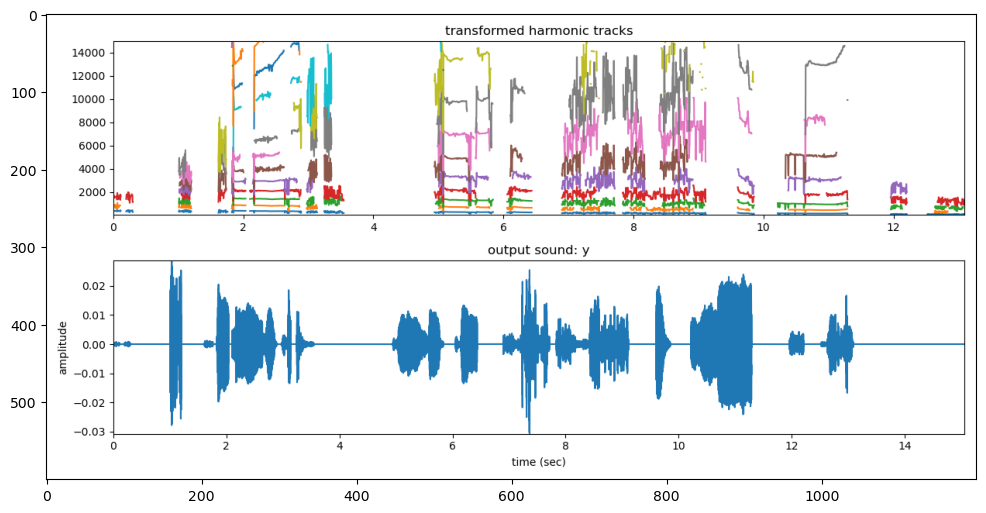

In [573]:
os.chdir('/Users/yoohyra/Desktop/SpeechProcessing/images')
img = plt.imread('Figure_2_trans.png')
plt.figure(figsize=(12, 15))
plt.imshow(img)



> **Function**


```
# compute the harmonic model of the whole sound
hfreq, hmag, hphase = HM.harmonicModelAnal(x: np.ndarray, fs: int , w: np.ndarray,
                                           N: int, H: int, t: float, nH: int, minf0: int, maxf0: int,
                                           f0et: int , harmDevSlope: float, minSineDur: float) -> np.ndarray
```

> **Self-experience**
  
  - I insert my singing sound. The Harmonic section has two parts: analysis/synthesis and apply transformation. If you want to apply transformation, you must press analysis/synthesis first.
  - When selecting analysis/synthesis, the output will have other sounds mixed in, the sound will also lose sound in certain places and there will be a lot of noise mixed in.
  - When I choose apply transformation, what I get sounds like a series of signals and there are places where it sounds like the sound is distorted.



> **Objective**

 - This function is designed to analyze a sound signal and extract information about its harmonic content.


> **Parameters**

  1. x: Input sound signal.

  2. fs: Sampling rate.

  3. w: Analysis window.

  4. N: FFT size (minimum 512).

  5. H: Hop size.

  6. t: Threshold in negative dB for peak detection.

  7. nH: Maximum number of harmonics.

  8. minf0: Minimum fundamental frequency in Hz.

  10. maxf0: Maximum fundamental frequency in Hz.

  11. f0et: Error threshold in the fundamental frequency detection.

  12. harmDevSlope: Slope of harmonic deviation (default value is 0.01).

  13. minSineDur: Minimum duration of harmonics in seconds (default value is 0.02).








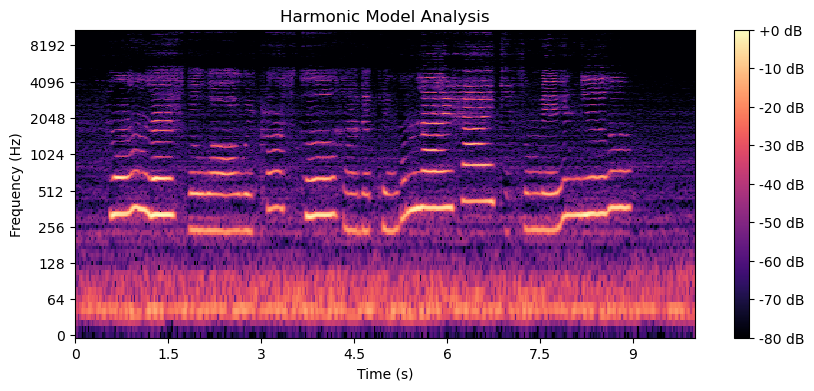

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def analyze_and_plot_harmonic_model(file_path: np.ndarray):
    '''
    This function loads the audio file, performs harmonic/percussive source separation,
    computes the magnitude and phase of the harmonic component,
    and then plots the harmonic frequencies over time.
    '''
    # Load the audio file
    y, sr = librosa.load(file_path)

    # Harmonic/percussive source separation
    harmonic, _ = librosa.effects.hpss(y)

    # Compute the harmonic component's magnitude and phase
    harmonic_mag, harmonic_phase = librosa.magphase(librosa.stft(harmonic))

    # Extract frequencies from the harmonic component
    harmonic_freqs = librosa.core.fft_frequencies(sr=sr)

    # Plot the harmonic frequencies
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(harmonic_mag, ref=np.max), y_axis='log', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Harmonic Model Analysis')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Example usage
file_path = '/Users/yoohyra/Desktop/SpeechProcessing/singing_voice.wav'
analyze_and_plot_harmonic_model(file_path)


## 4.4 Stochastic

> **Stochastic** after applying transformation:

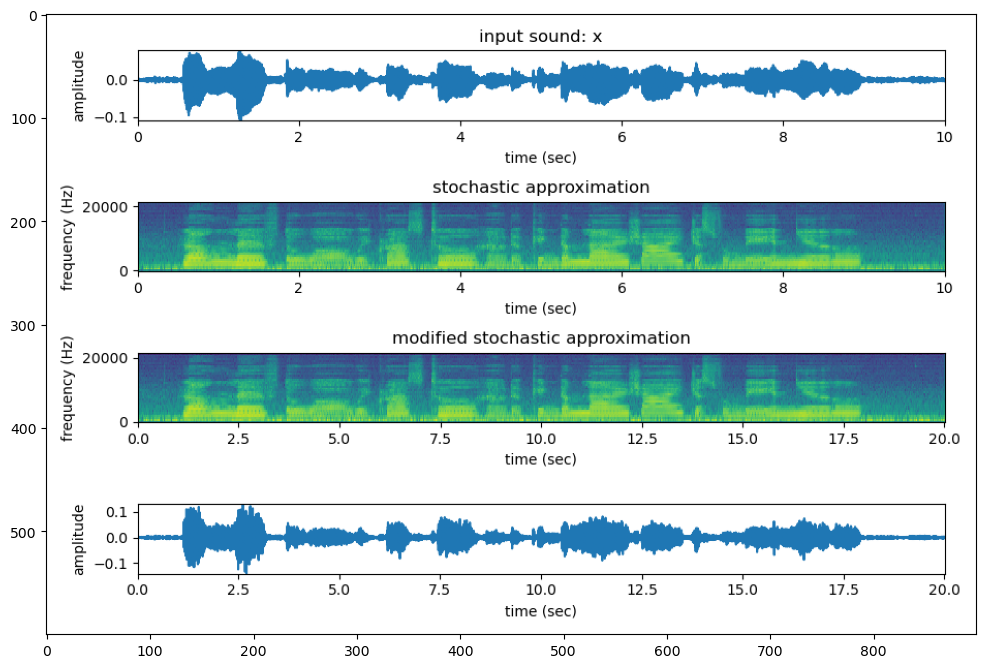

In [574]:
os.chdir('/Users/yoohyra/Desktop/SpeechProcessing/images')
img = plt.imread('Stochastic_trans.png')
plt.figure(figsize=(12, 15))
plt.imshow(img)



> **Function**


```
# perform stochastic analysis
mYst = STC.stochasticModelAnal(x, H, H*2, stocf)
	        
# perform time scaling of stochastic representation
ystocEnv = STCT.stochasticTimeScale(mYst, timeScaling)

# synthesize output sound
y = STC.stochasticModelSynth(ystocEnv, H, H*2)
```

> **Self-experience**
  
  - I insert my singing sound. The Stochastic has a variable called stocf, which is decimation factor of the magnitude spectrum for stochastic analysis, can be changed.
  - When I set stocf to 0.1 (default), the output I get is a voice that sounds like when I put my face close to a fan and sing and the sound is slowed down x2.



> **Objective**

 - The function **stochasticModelAnal** decimates the magnitude spectrum of the input sound signal and stacks the results over time to create a stochastic envelope, capturing the evolution of the sound's spectral characteristics.

 - The function **stochasticTimeScale** uses linear interpolation based on the provided time scaling factors to create a new stochastic envelope with a different time scale.

 - The funtion **stochasticModelSynth** is used for the stochastic synthesis of a sound based on a stochastic envelope. In the context of audio signal processing and modeling, stochastic synthesis involves generating a sound by reconstructing the time-varying spectral envelope of the original signal.


> **Parameters**

  * In funtion **stochasticModelAnal**
  1. x (np.ndarray): Input array representing the sound signal.

  2. H (int): Hop size, indicating the number of samples between successive analysis frames.

  3. N(int): FFT size, specifying the size of the FFT used for analysis.

  4. stocf (float): Decimation factor of the magnitude spectrum for stochastic analysis. It should be greater than 0 and less than or equal to 1.

  5. fs(int): Sampling rate of the input signal (optional, default is 44100).

  6. melScale (int): Parameter to choose between linear scale (0) or mel scale (1) for the frequency representation (optional, default is 1 for mel scale).

  7. stocEnv (np.ndarray): Stochastic envelope representing the decimated magnitude spectrum over time.

  * In funtion **stochasticTimeScale**
  1. stocEnv (np.ndarray): Stochastic envelope representing the decimated magnitude spectrum over time.

  2. timeScaling (np.ndarray): Scaling factors for time, given as an array of time-value pairs. It is used to determine the scaling factors for each frame in the stochastic representation.

  3. ystocEnv (np.ndarray): Stochastic envelope after time scaling.

  * In funtion **stochasticModelSynth**
  1. stocEnv (np.ndarray): Stochastic envelope representing the decimated magnitude spectrum over time.

  2. H (int): Hop size for synthesis, indicating the number of samples between consecutive frames.

  3. N (int): FFT size, representing the size of the FFT used for synthesis.

  4. fs (int): Sampling rate of the sound.

  5. melScale (int): Parameter indicating whether the mel scale is used (1) or linear scale (0) during synthesis. It should match the scale used during analysis.

  6. y (np.ndarray): Output sound after stochastic synthesis.







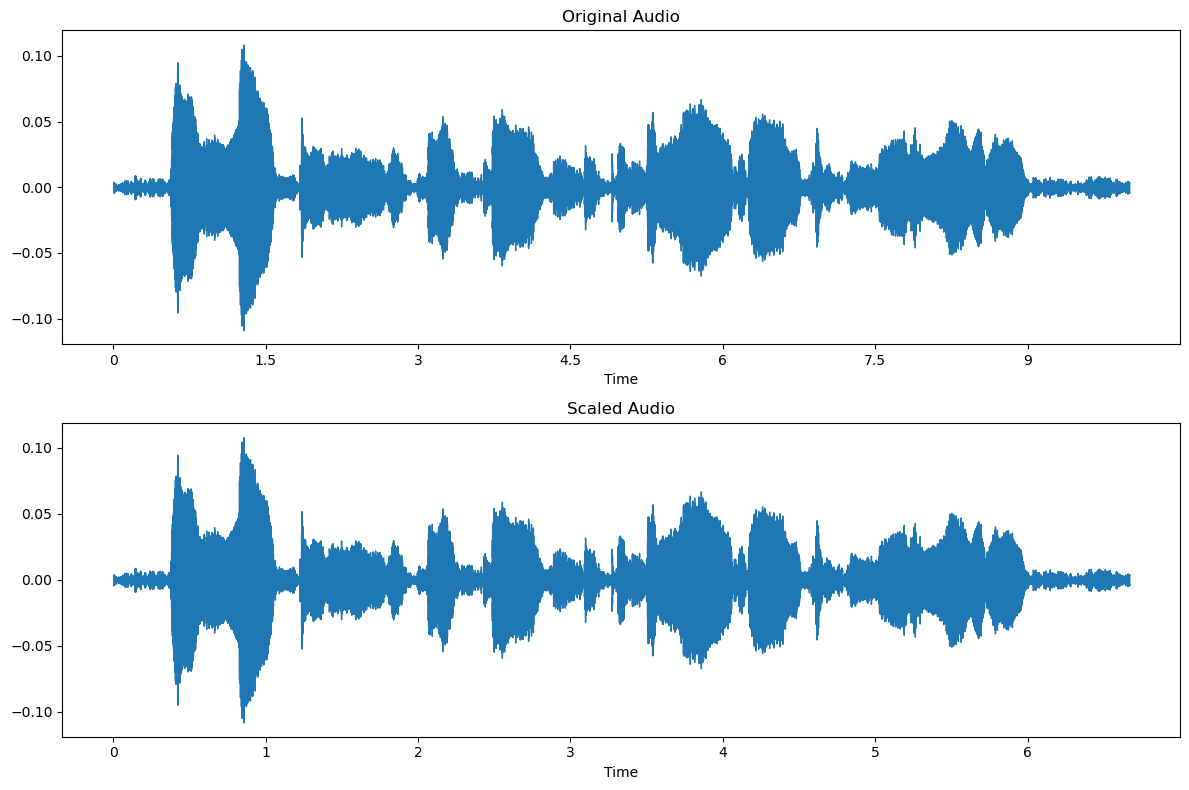

In [ ]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

def time_scaling(input_file, output_file, scaling_factor):
    # Load the audio file
    audio = AudioSegment.from_file(input_file)

    # Extract the audio data as numpy array
    samples = np.array(audio.get_array_of_samples())

    # Calculate the new length after time scaling
    new_length = int(len(samples) / scaling_factor)

    # Perform time scaling using numpy
    scaled_samples = np.interp(
        np.arange(0, len(samples), scaling_factor),
        np.arange(0, len(samples)),
        samples
    ).astype(samples.dtype)

    # Convert the scaled samples to floating-point
    samples_float = samples.astype(np.float32) / np.iinfo(samples.dtype).max
    scaled_samples_float = scaled_samples.astype(np.float32) / np.iinfo(scaled_samples.dtype).max

    # Convert the scaled samples back to AudioSegment
    scaled_audio = AudioSegment(
        scaled_samples.tobytes(),
        frame_rate=audio.frame_rate,
        sample_width=samples.dtype.itemsize,
        channels=audio.channels
    )

    # Export the scaled audio to a new file
    scaled_audio.export(output_file, format="wav")

    return samples_float, scaled_samples_float, audio.frame_rate

def plot_frequencies(samples, scaled_samples, frame_rate):
    # Plot frequencies before time scaling
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(samples, sr=frame_rate)
    plt.title('Original Audio')

    # Plot frequencies after time scaling
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(scaled_samples, sr=frame_rate)
    plt.title('Scaled Audio')

    plt.tight_layout()
    plt.show()
# Example usage
if __name__ == "__main__":
    input_file = "/Users/yoohyra/Desktop/SpeechProcessing/singing_voice.wav"
    output_file = "/Users/yoohyra/Desktop/SpeechProcessing/file_scaled.wav"
    scaling_factor = 1.5  # Adjust this value for the desired time scaling factor

    original_samples, scaled_samples, frame_rate = time_scaling(input_file, output_file, scaling_factor)
    plot_frequencies(original_samples, scaled_samples, frame_rate)


## 4.5 HPS

> Speech analysis and synthesis method: **HPS**

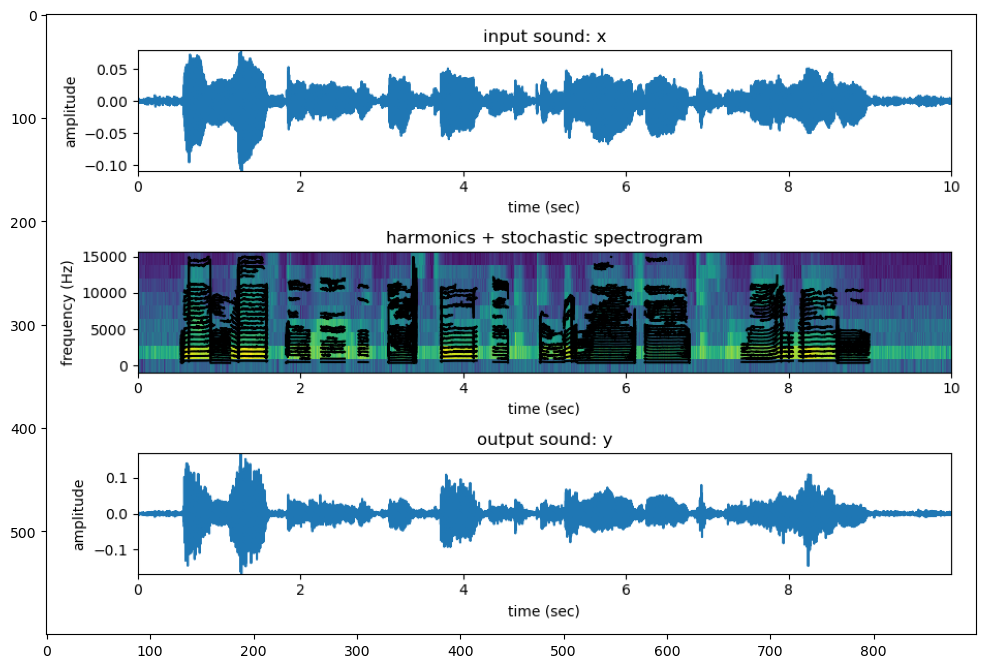

In [575]:
os.chdir('/Users/yoohyra/Desktop/SpeechProcessing/images')
img = plt.imread('Figure_3.png')
plt.figure(figsize=(12, 15))
plt.imshow(img)

> After applying transformation:

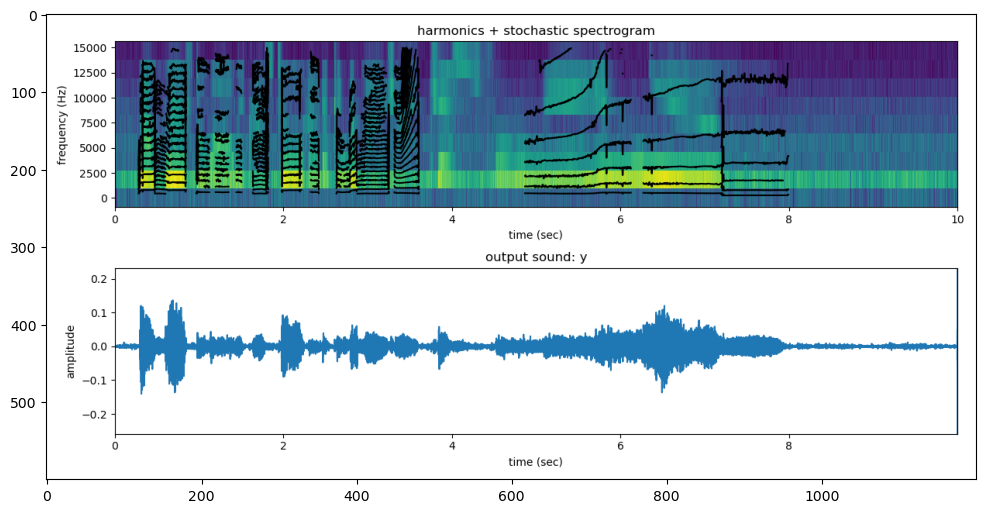

In [576]:
os.chdir('/Users/yoohyra/Desktop/SpeechProcessing/images')
img = plt.imread('Figure_3_trans.png')
plt.figure(figsize=(12, 15))
plt.imshow(img)



> **Function**


```
# compute the harmonic plus stochastic model of the whole sound
hfreq, hmag, hphase, mYst = HPS.hpsModelAnal(x, fs, w, N, H, t, nH, minf0, maxf0, f0et, harmDevSlope, minSineDur, Ns, stocf)

# synthesize the harmonic plus stochastic model without original phases
y, yh, yst = HPS.hpsModelSynth(hfreq, hmag, np.array([]), mYst, Ns, H, fs)

```

> **Self-experience**
  
  - I insert my singing sound. The HPS section has two parts: analysis/synthesis and apply transformation. If you want to apply transformation, you must press analysis/synthesis first.
  - When selecting analysis/synthesis, the output will have a wind-like sound alongside the singing voice, with a few places where a deeper voice will run over the main vocal.
  - When I choose apply transformation, What I hear is that the sound file is at x2 speed, there is still the sound of wind blowing and about the last 2 seconds the sound will slow down and stretch out.



> **Objective**

 - The function **hpsModelAnal** extracts harmonic information, including frequencies, magnitudes, and phases, through harmonic analysis. The function then separates the harmonic components from the original signal and analyzes the residual signal stochastically, providing a hybrid model that captures both deterministic harmonic structures and stochastic characteristics for sound analysis and synthesis.

 - The funtion **hpsModelSynth** takes harmonic frequencies, amplitudes, and phases, along with a stochastic envelope, to generate the harmonic and stochastic components separately. The resulting sound is a combination of synthesized harmonics and stochastic elements, providing a reconstructed signal that captures both deterministic harmonic features and stochastic variations.


> **Parameters**

  * In funtion **hpsModelAnal**
  1. x (np.ndarray): Input sound

  2. fs (int): Sampling rate.

  3. w (np.ndarray): Analysis window.

  4. N (int): FFT size.

  5. H (int): Hop size.

  6. t: Threshold in negative dB, assumed to be a numerical value.

  7. nH (int): Maximum number of harmonics.

  8. minf0: Minimum fundamental frequency in Hz, assumed to be a numerical value.

  9. maxf0: Maximum fundamental frequency in Hz, assumed to be a numerical value.

  10. f0et: Error threshold in the f0 detection, assumed to be a numerical value.

  11. harmDevSlope: Slope of harmonic deviation, assumed to be a numerical value.

  12. minSineDur: Minimum length of harmonics, assumed to be a numerical value.

  13. Ns (int): Number of sinusoids to be used in sineSubtraction.

  14. stocf: Stochastic decimation factor, assumed to be a numerical value.

  * In funtion **hpsModelSynth**
  1. hfreq: Harmonic frequencies, assumed to be a NumPy array.

  2. hmag: Harmonic amplitudes, assumed to be a NumPy array.

  3. hphase: Harmonic phases, assumed to be a NumPy array.

  4. stocEnv: Stochastic envelope, assumed to be a NumPy array.

  5. N: Synthesis FFT size, assumed to be an integer.

  6. H: Hop size, assumed to be an integer.

  7. fs: Sampling rate, assumed to be a numerical value (float or int)








In [354]:
pip install pyrubberband


Note: you may need to restart the kernel to use updated packages.


In [ ]:
%%bash
brew install rubberband


/var/folders/17/5m7q0qh10ts9jjt0xxl3grk80000gn/T/ipykernel_92511/1175781161.py:24: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  harmonic_spec = librosa.amplitude_to_db(librosa.stft(harmonic, n_fft=n_fft, hop_length=hop_length), ref=np.max)
/var/folders/17/5m7q0qh10ts9jjt0xxl3grk80000gn/T/ipykernel_92511/1175781161.py:25: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  stochastic_spec = librosa.amplitude_to_db(librosa.stft(stochastic, n_fft=n_fft, hop_length=hop_length), ref=np.max)
/var/folders/17/5m7q0qh10ts9jjt0xxl3grk80000gn/T/ipykernel_92511/1175781161.py:41: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(

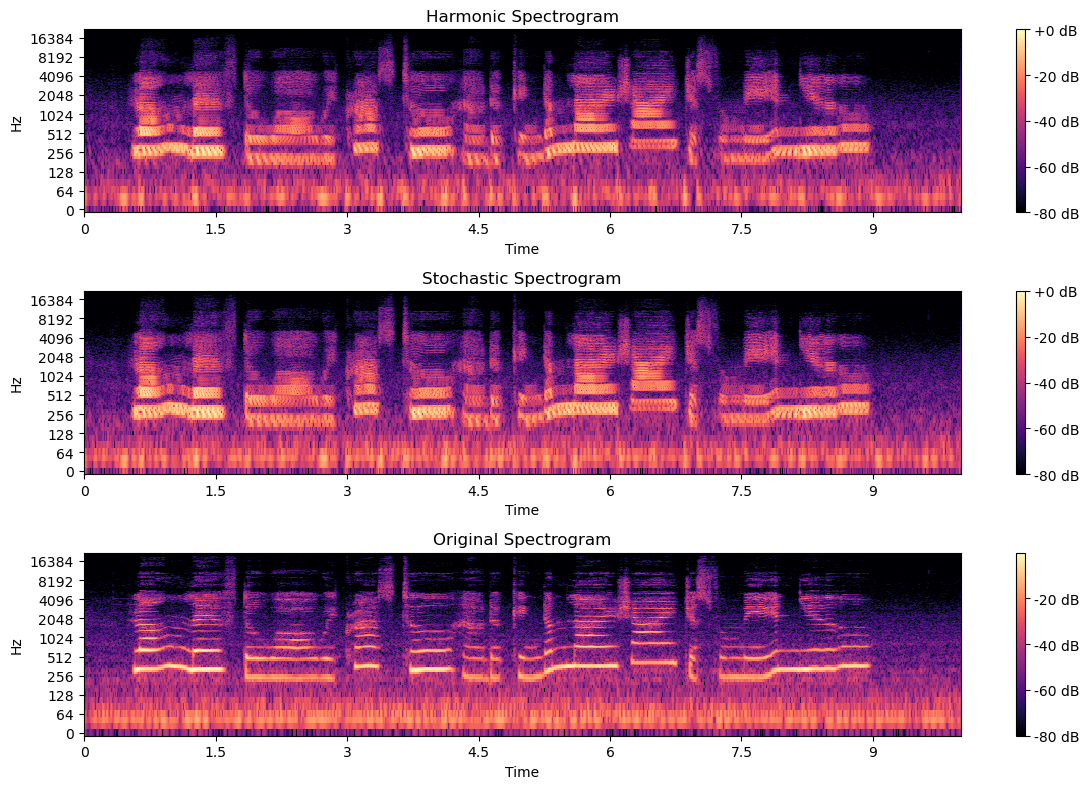

In [362]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pyrubberband

def hps_analysis(y, sr, n_fft=2048, hop_length=512, num_harmonics=5):
    # Compute the harmonic component using HPS
    harmonic = np.zeros_like(y)
    for i in range(1, num_harmonics + 1):
        y_harmonic = pyrubberband.pitch_shift(y, sr, n_steps=-i)
        harmonic += y_harmonic

    # Compute the stochastic component
    stochastic = y - harmonic

    return harmonic, stochastic

def plot_hps_spectrogram(y, sr, n_fft=2048, hop_length=512, num_harmonics=5):
    # Analyze sound using HPS model
    harmonic, stochastic = hps_analysis(y, sr, n_fft=n_fft, hop_length=hop_length, num_harmonics=num_harmonics)

    # Compute spectrograms for harmonic and stochastic components
    harmonic_spec = librosa.amplitude_to_db(librosa.stft(harmonic, n_fft=n_fft, hop_length=hop_length), ref=np.max)
    stochastic_spec = librosa.amplitude_to_db(librosa.stft(stochastic, n_fft=n_fft, hop_length=hop_length), ref=np.max)

    # Plot the harmonics + stochastic spectrogram
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    librosa.display.specshow(harmonic_spec, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Harmonic Spectrogram')

    plt.subplot(3, 1, 2)
    librosa.display.specshow(stochastic_spec, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Stochastic Spectrogram')

    plt.subplot(3, 1, 3)
    librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max),
                             sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Original Spectrogram')

    plt.tight_layout()
    plt.show()

# Example usage
file_path = '/Users/yoohyra/Desktop/SpeechProcessing/singing_voice.wav'
y, sr = librosa.load(file_path, sr=None)

plot_hps_spectrogram(y, sr)


## 4.6 DFT

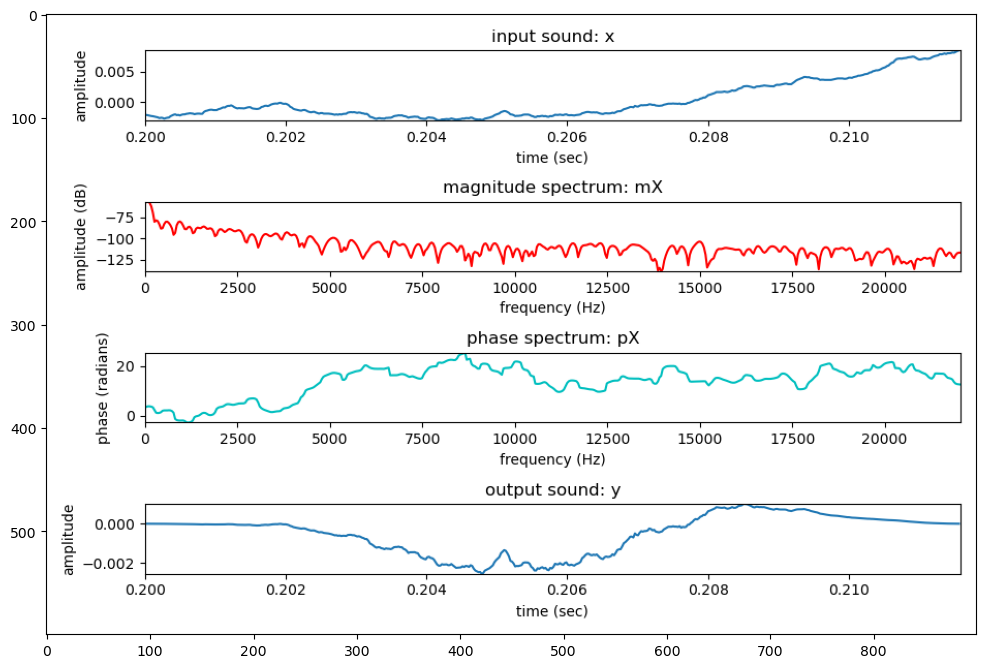

In [578]:
os.chdir('/Users/yoohyra/Desktop/SpeechProcessing/images')
img = plt.imread('Model_DFT.png')
plt.figure(figsize=(12, 15))
plt.imshow(img)



> **Function**


```
# compute the dft of the sound fragment
mX, pX = DFT.dftAnal(x1, w, N)

# compute the inverse dft of the spectrum
y = DFT.dftSynth(mX, pX, w.size)*sum(w)

```




> **Objective**

 - The function **dftAnal** calculates the magnitude and phase spectra of the input signal using a specified analysis window and FFT size. This analysis is crucial in understanding the frequency content and phase information of the signal, which is valuable in various signal processing applications such as spectral analysis and synthesis.

 - The funtion **dftSynth** is utilized for synthesizing a signal based on its magnitude and phase spectra obtained from a previous discrete Fourier transform (DFT) analysis.


> **Parameters**

  * In funtion **dftAnal**
  1. x: Input signal (numpy array).

  2. w: Analysis window (numpy array).

  3. N: FFT size (integer).

  4. mX: Magnitude spectrum (numpy array).

  5. pX: Phase spectrum (numpy array).

  * In funtion **dftSynth**
  1. mX: Magnitude spectrum (numpy array).

  2. pX: Phase spectrum (numpy array).

  3. M: Window size (integer).

  4. y: Output signal (numpy array).








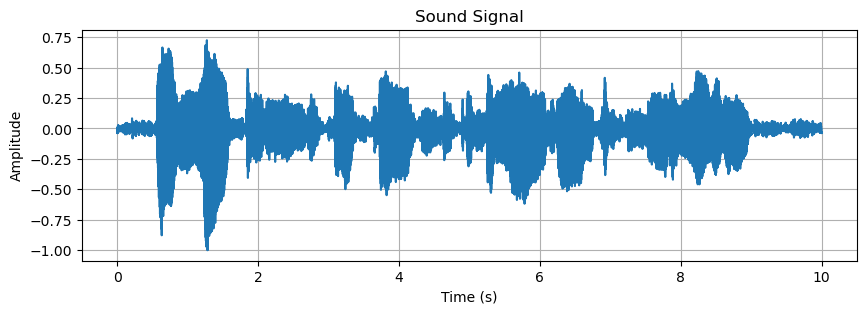

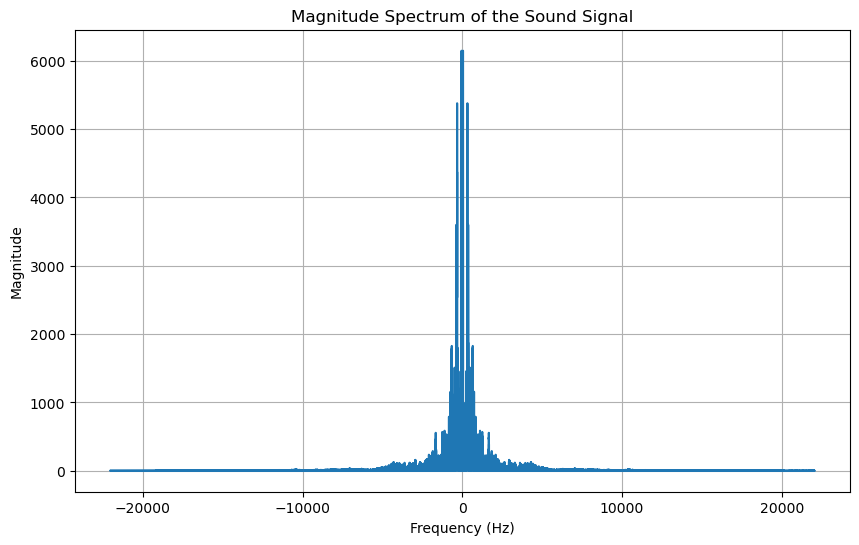

In [361]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def plot_magnitude_spectrum(signal, sampling_rate):
    # Compute the Discrete Fourier Transform (DFT)
    fft_result = np.fft.fft(signal)

    # Calculate the frequencies corresponding to the DFT result
    frequencies = np.fft.fftfreq(len(signal), d=1/sampling_rate)

    # Take the magnitude of the complex numbers to get the magnitude spectrum
    magnitude_spectrum = np.abs(fft_result)

    # Plot the magnitude spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, magnitude_spectrum)
    plt.title('Magnitude Spectrum of the Sound Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Load an example sound file
    file_path = '/Users/yoohyra/Desktop/SpeechProcessing/singing_voice.wav'
    sampling_rate, signal = wavfile.read(file_path)

    # Normalize the signal to the range [-1, 1]
    signal = signal / np.max(np.abs(signal), axis=0)

    # Plot the sound signal
    plt.figure(figsize=(10, 3))
    time = np.arange(0, len(signal)) / sampling_rate
    plt.plot(time, signal)
    plt.title('Sound Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

    # Plot the magnitude spectrum using the function
    plot_magnitude_spectrum(signal, sampling_rate)


## **4.7 SPR**

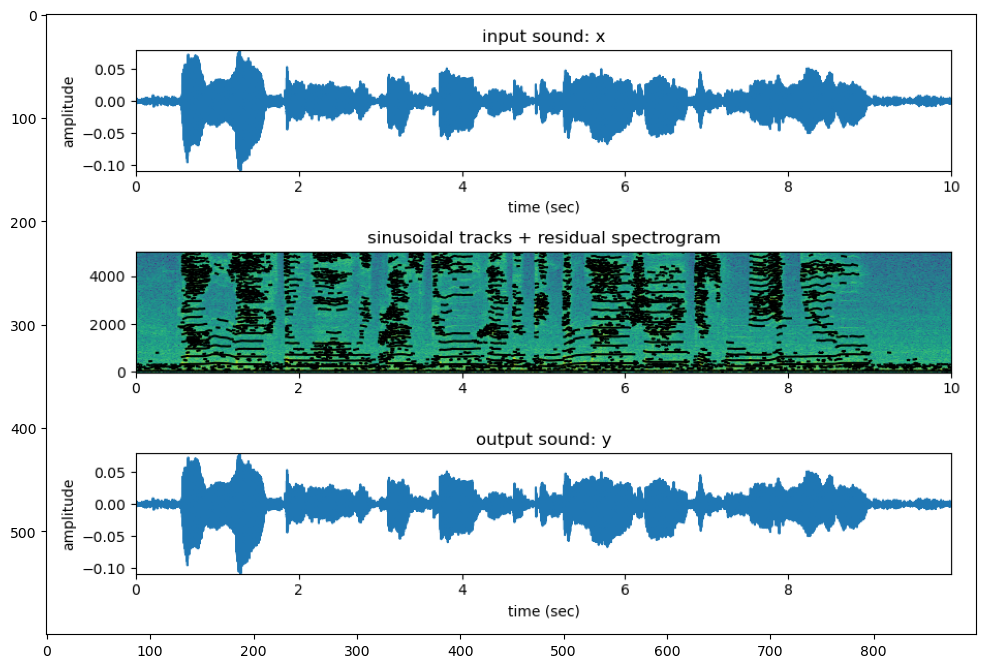

In [579]:
os.chdir('/Users/yoohyra/Desktop/SpeechProcessing/images')
img = plt.imread('Model_SPR.png')
plt.figure(figsize=(12, 15))
plt.imshow(img)



> **Function**


```
# perform sinusoidal plus residual analysis
tfreq, tmag, tphase, xr = SPR.sprModelAnal(x, fs, w, N, H, t, minSineDur, maxnSines, freqDevOffset, freqDevSlope)

# sum sinusoids and residual
y, ys = SPR.sprModelSynth(tfreq, tmag, tphase, xr, Ns, H, fs)


```
> **Self-experience**

  - The SPR section has 3 parts: Sinusoidal, Residual and Output.

  - When I select Sinusoidal, the sound output is no different from the input file.
  
  - When I select Residual, the sound comes out with a hiss mixed in.
  
  - When selecting Output, the received sound is still the same as the input file but you will hear a small hum running in parallel.


> **Objective**

 - The function **sprModelAnal** is part of a sinusoidal modeling process that decomposes an input sound signal into its sinusoidal components (harmonic frequencies, magnitudes, and phases) and a residual signal.

 - The funtion **sprModelSynth** is used for synthesizing a sound based on sinusoidal modeling using the sinusoidal plus residual model.
 - The sinusoidal component is generated using the **SM.sineModelSynth** function, and it is combined with the given residual signal to produce the final output sound.


> **Parameters**

  * In funtion **sprModelAnal**
  1. x (np.ndarray): Input sound.

  2. fs (int): Sampling rate of the input sound.

  3. w (np.ndarray): Analysis window .

  4. N (int): FFT size .

  5. H (int): Hop size.

  6. t (float): Threshold in negative dB .

  7. minSineDur (int): Minimum duration of sinusoidal tracks .

  8. maxnSines (int): Maximum number of parallel sinusoids .

  9. freqDevOffset (float): Frequency deviation allowed in the sinusoids from frame to frame at frequency 0.

  10. freqDevSlope (float): Slope of the frequency deviation, higher frequencies have a bigger deviation.

  * In funtion **sprModelSynth**
  1. tfreq (np.ndarray): Sinusoidal frequencies.
  
  2. tmag (np.ndarray): Sinusoidal amplitudes.

  3. tphase (np.ndarray): Sinusoidal phases.
  
  4. xr (np.ndarray): Residual signal.
  
  5. N (int): Synthesis FFT size.
  
  6. H (int): Hop size.
  
  7. fs (int): Sampling rate.








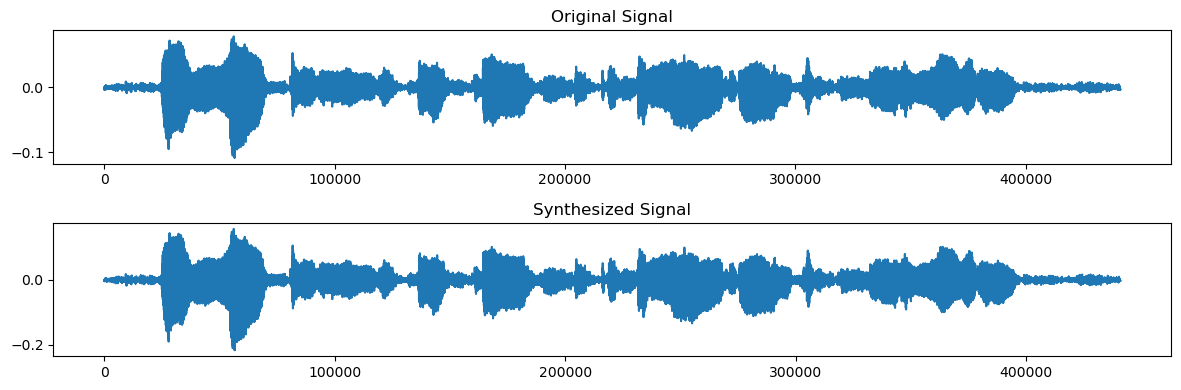

In [548]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

def analyze_signal(signal, window_size, hop_size):
    num_frames = (len(signal) - window_size) // hop_size + 1
    frames = np.zeros((num_frames, window_size))

    for i in range(num_frames):
        start = i * hop_size
        end = start + window_size
        frames[i, :] = signal[start:end]

    return frames

def synthesize_frames(frames, hop_size):
    num_frames, window_size = frames.shape
    signal_length = (num_frames - 1) * hop_size + window_size
    synthesized_signal = np.zeros(signal_length)

    for i in range(num_frames):
        start = i * hop_size
        end = start + window_size
        synthesized_signal[start:end] += frames[i, :]

    return synthesized_signal

# Parameters
file_path = '/Users/yoohyra/Desktop/SpeechProcessing/singing_voice.wav'
window_size = 1024
hop_size = 512

# Load the audio file
original_signal, sr = librosa.load(file_path, sr=None)

# Plot the original signal
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(original_signal)
plt.title('Original Signal')

# Analyze and synthesize signal
frames = analyze_signal(original_signal, window_size, hop_size)
synthesized_signal = synthesize_frames(frames, hop_size)

# Plot the synthesized signal
plt.subplot(2, 1, 2)
plt.plot(synthesized_signal)
plt.title('Synthesized Signal')

plt.tight_layout()
plt.show()


## **4.8 SPS**

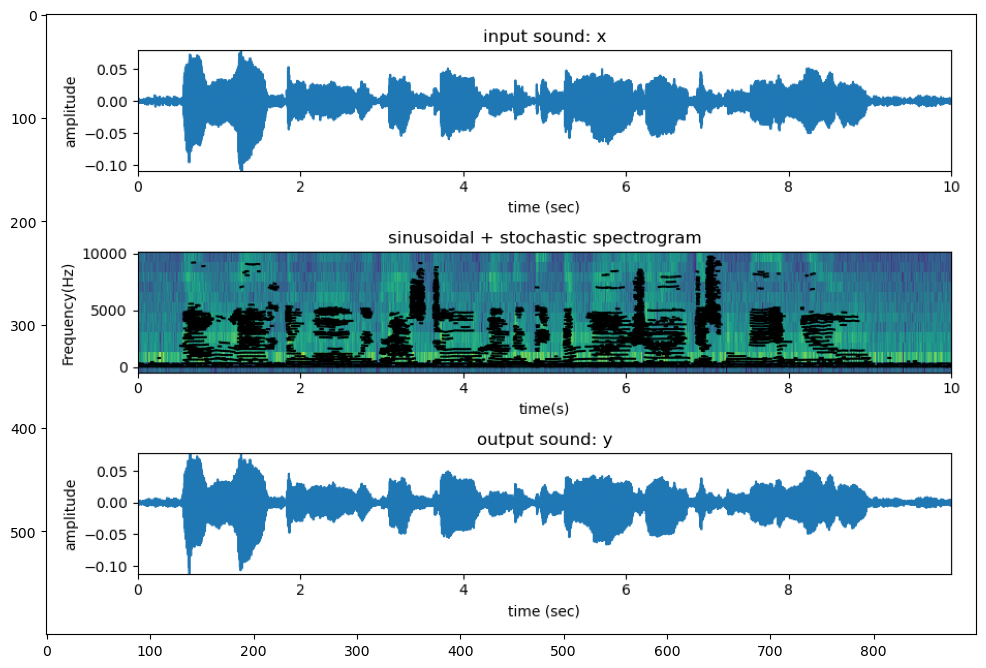

In [580]:
os.chdir('/Users/yoohyra/Desktop/SpeechProcessing/images')
img = plt.imread('Model_SPS.png')
plt.figure(figsize=(12, 15))
plt.imshow(img)



> **Function**


```
# perform sinusoidal+sotchastic analysis
tfreq, tmag, tphase, stocEnv = SPS.spsModelAnal(x, fs, w, N, H, t, minSineDur, maxnSines, freqDevOffset, freqDevSlope, stocf)

# synthesize sinusoidal+stochastic model
y, ys, yst = SPS.spsModelSynth(tfreq, tmag, tphase, stocEnv, Ns, H, fs)


```
> **Self-experience**

  - The SPS section has 3 parts: Sinusoidal, Stochastic and Output.

  - When I select Sinusoidal, the sound output is no different from the input file.
  
  - When I select Stochastic, the sound comes out like whispering singing.



> **Objective**

 - The function **spsModelAnal** decompose an input sound signal into two components: harmonic sinusoidal components and a stochastic (random) residual component. This type of analysis is common in audio signal processing and synthesis, where understanding the underlying harmonic structure (sinusoids) and capturing the stochastic characteristics of the signal are important.

 - The funtion **spsModelSynth** is designed for synthesizing a sound signal using a combination of sinusoidal and stochastic modeling, allowing for a more faithful reproduction of the characteristics present in the original sound.


> **Parameters**

  * In funtion **spsModelAnal**
  1. x (np.ndarray): Input sound.

  2. fs (int): Sampling rate of the input sound.

  3. w (np.ndarray): Analysis window .

  4. N (int): FFT size .

  5. H (int): Hop size.

  6. t (float): Threshold in negative dB .

  7. minSineDur (int): Minimum duration of sinusoidal tracks .

  8. maxnSines (int): Maximum number of parallel sinusoids .

  9. freqDevOffset (float): Frequency deviation allowed in the sinusoids from frame to frame at frequency 0.

  10. freqDevSlope (float): Slope of the frequency deviation, higher frequencies have a bigger deviation.

  11. stocf: Stochastic decimation factor, assumed to be a numerical value.

  * In funtion **spsModelSynth**
  1. tfreq (np.ndarray): Sinusoidal frequencies.
  
  2. tmag (np.ndarray): Sinusoidal amplitudes.

  3. tphase (np.ndarray): Sinusoidal phases.
  
  4. stocEnv (np.ndarray): Stochastic envelope.
  
  5. N (int): Synthesis FFT size.
  
  6. H (int): Hop size.
  
  7. fs (int): Sampling rate.

  8. y (np.ndarray): Output sound (the sum of sinusoidal and stochastic components).
  
  9. ys (np.ndarray): Sinusoidal component.
  
  10. yst (np.ndarray): Stochastic component








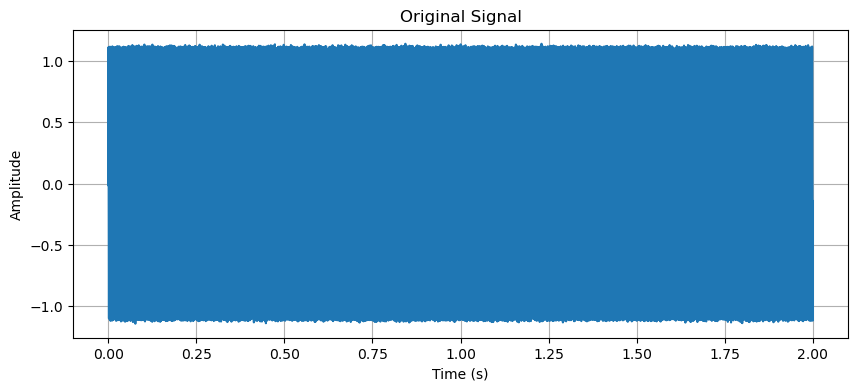

/var/folders/17/5m7q0qh10ts9jjt0xxl3grk80000gn/T/ipykernel_92511/4234863116.py:38: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')


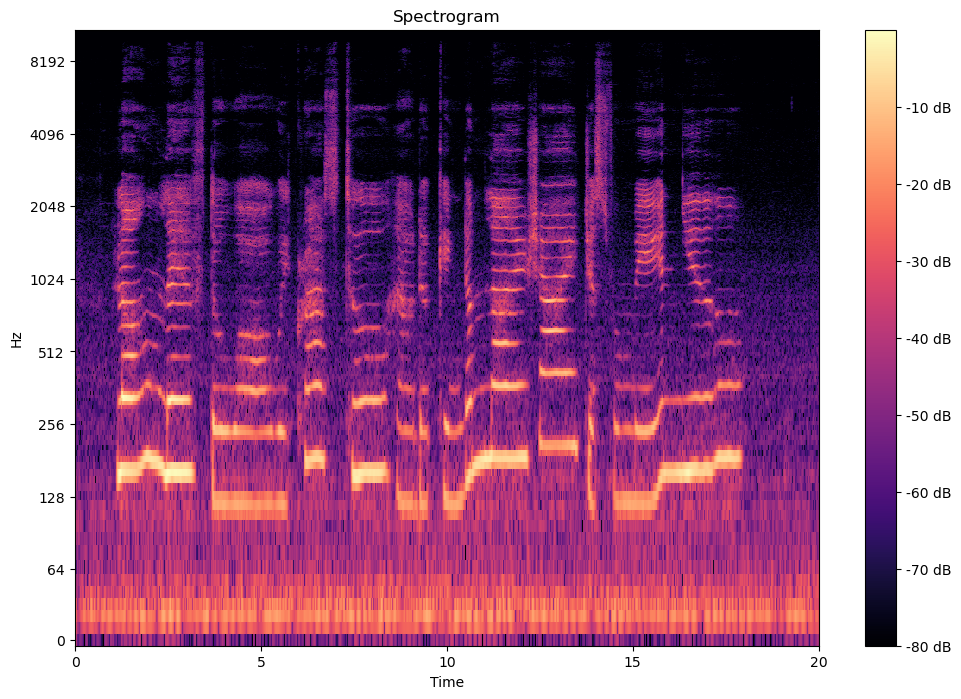

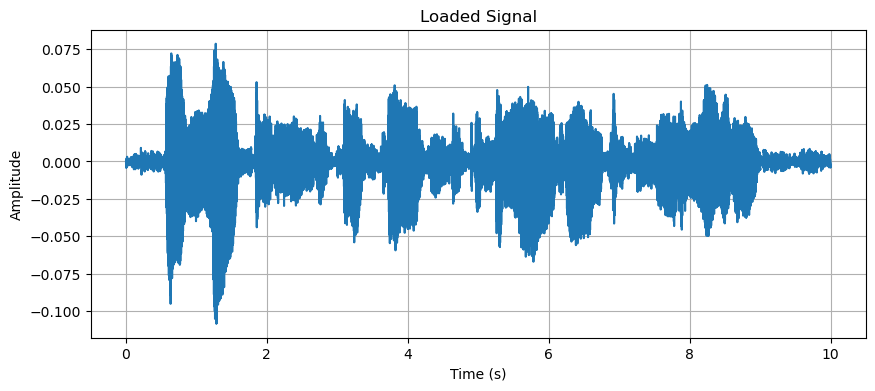

In [552]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

def generate_signal(duration, sampling_rate, frequencies, amplitudes, noise_level=0.01):
    t = np.arange(0, duration, 1/sampling_rate)
    signal = np.zeros_like(t)

    # Add sinusoidal components
    for freq, amp in zip(frequencies, amplitudes):
        signal += amp * np.sin(2 * np.pi * freq * t)

    # Add stochastic noise
    noise = np.random.normal(0, noise_level, len(t))
    signal += noise

    return t, signal

def plot_signal(t, signal, title):
    plt.figure(figsize=(10, 4))
    plt.plot(t, signal)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

def analyze_sound_file(file_path):
    # Load the sound file
    y, sr = librosa.load(file_path, sr=None)

    # Perform analysis on the loaded signal (you need to implement this part)
   # Example: Short-time Fourier Transform (STFT)
    D = librosa.stft(y)

    # Example: Display the spectrogram
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
    plt.title('Spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.show()
    return y, sr

def main():
    # Parameters
    duration = 2  # seconds
    sampling_rate = 44100  # Hz
    frequencies = [440, 880, 1320]  # Hz
    amplitudes = [0.8, 0.4, 0.2]

    # Generate and plot the original signal
    original_time, original_signal = generate_signal(duration, sampling_rate, frequencies, amplitudes)
    plot_signal(original_time, original_signal, 'Original Signal')

    # Analyze the sound file (replace 'your_sound_file.wav' with your actual sound file)
    sound_file_path = '/Users/yoohyra/Desktop/SpeechProcessing/singing_voice.wav'
    loaded_signal, loaded_sampling_rate = analyze_sound_file(sound_file_path)

    # Plot the loaded signal
    plot_signal(np.arange(0, len(loaded_signal))/loaded_sampling_rate, loaded_signal, 'Loaded Signal')

if __name__ == "__main__":
    main()


## **4.9 HPR**

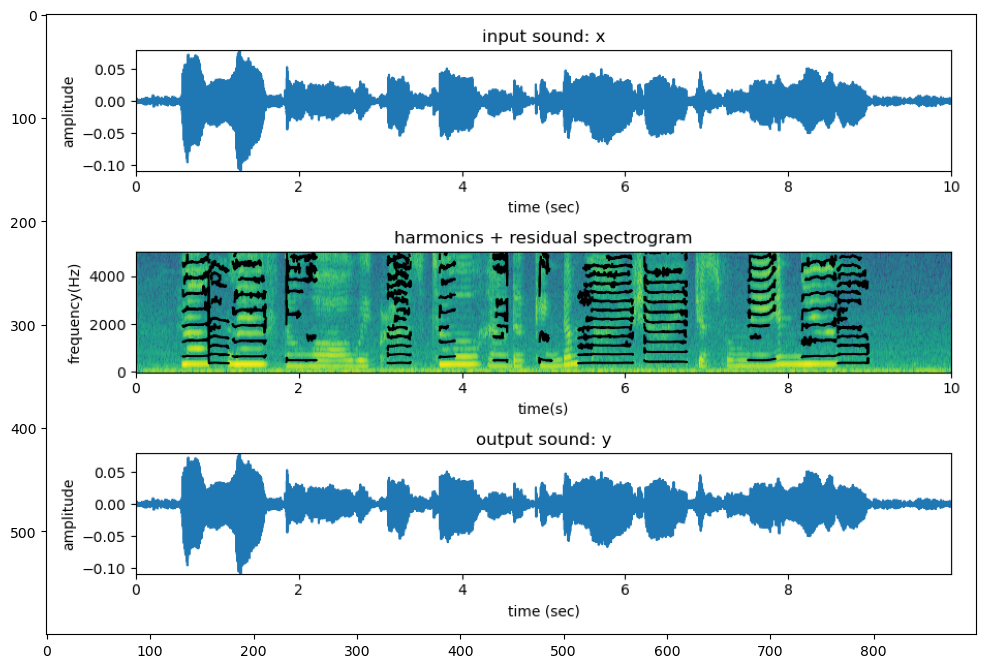

In [581]:
os.chdir('/Users/yoohyra/Desktop/SpeechProcessing/images')
img = plt.imread('Model_HPR.png')
plt.figure(figsize=(12, 15))
plt.imshow(img)



> **Function**


```
# find harmonics and residual
hfreq, hmag, hphase, xr = HPR.hprModelAnal(x, fs, w, N, H, t, minSineDur, nH, minf0, maxf0, f0et, harmDevSlope)
	  
# synthesize hpr model
y, yh = HPR.hprModelSynth(hfreq, hmag, hphase, xr, Ns, H, fs)


```
> **Self-experience**

  - The HPR section has 3 parts: Sinusoidal, Residual and Output.

  - When I select Sinusoidal, the sound comes out in some parts as if it were tuned, in some parts there is no sound, and in some parts it is normal.
  
  - When I select Residual, the sound comes out like singing tuned to the signal and the last part turns into whispering singing.

  - When selecting Output, the received sound is still the same as the input file but you will hear a small hissing sound running underneath.



> **Objective**

 - The function **hprModelAnal** aims to decompose the input sound into harmonic components and a residual signal, allowing for a more detailed understanding of its harmonic structure.

 - The funtion **hprModelSynth** combines the harmonic component (sinusoidal) with the residual signal to produce the final output sound.


> **Parameters**

  * In funtion **hprModelAnal**
  1. x (np.ndarray): Input sound.

  2. fs (int): Sampling rate of the input sound.

  3. w (np.ndarray): Analysis window .

  4. N (int): FFT size .

  5. H (int): Hop size.

  6. t (float): Threshold in negative dB .

  7. minSineDur (int): Minimum duration of sinusoidal tracks .

  8. nH: Maximum number of harmonics.

  9. minf0 (float): Minimum fundamental frequency in the sound.
  
  10. maxf0 (float): Maximum fundamental frequency in the sound.

  11. f0et (float): Maximum error accepted in the fundamental frequency detection algorithm.

  12. harmDevSlope (float): Allowed deviation of harmonic tracks, where higher harmonics have a higher allowed deviation.

  * In funtion **hprModelSynth**
  1. tfreq (np.ndarray): Sinusoidal frequencies.
  
  2. hmag (np.ndarray): Harmonic amplitudes.

  3. hphase (np.ndarray): Harmonic phases.
  
  4. xr (np.ndarray): Residual signal.
  
  5. N (int): Synthesis FFT size.
  
  6. H (int): Hop size.
  
  7. fs (int): Sampling rate.








/var/folders/17/5m7q0qh10ts9jjt0xxl3grk80000gn/T/ipykernel_92511/1463123653.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sinusoidal_wave = np.sum(


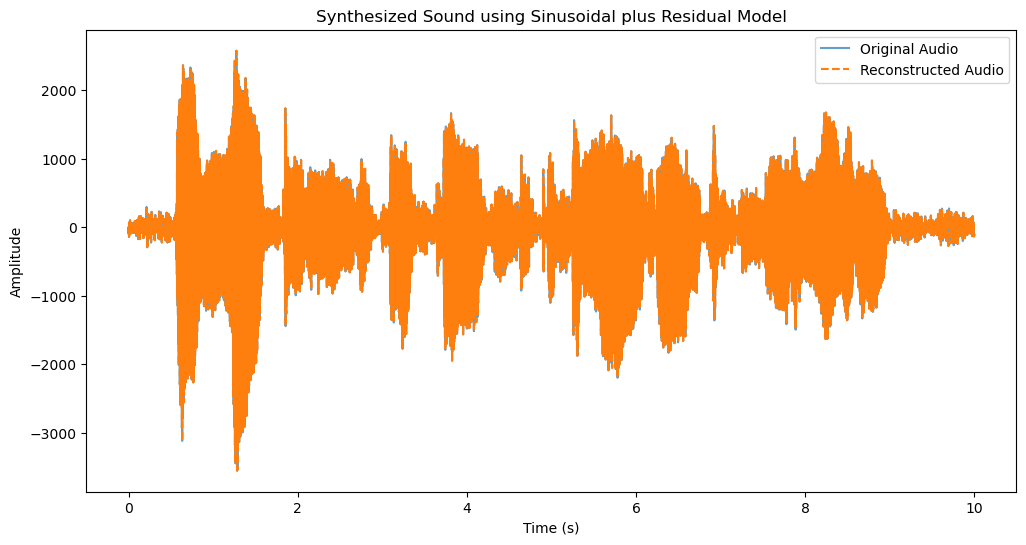

In [563]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def generate_sinusoidal_component(frequency, amplitude, phase, duration, sample_rate):
    t = np.arange(0, duration, 1/sample_rate)
    sinusoidal_wave = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    return sinusoidal_wave

def synthesize_sound(sinusoidal_parameters, residual_signal, sample_rate):
    # Synthesize sinusoidal components
    sinusoidal_wave = np.sum(
        generate_sinusoidal_component(freq, amp, phase, duration, sample_rate)
        for freq, amp, phase in sinusoidal_parameters
    )

    # Add the residual signal
    synthesized_sound = sinusoidal_wave + residual_signal

    return synthesized_sound

def plot_synthesized_sound(original_audio, reconstructed_audio, sample_rate):
    time_axis = np.arange(0, len(original_audio) / sample_rate, 1 / sample_rate)

    plt.figure(figsize=(12, 6))
    plt.plot(time_axis, original_audio, label='Original Audio', alpha=0.7)
    plt.plot(time_axis, reconstructed_audio, label='Reconstructed Audio', linestyle='--')
    plt.title('Synthesized Sound using Sinusoidal plus Residual Model')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    audio_file_path = '/Users/yoohyra/Desktop/SpeechProcessing/singing_voice.wav'

    # Read the audio file
    sample_rate, residual_signal = wavfile.read(audio_file_path)
    duration = len(residual_signal) / sample_rate

    # Replace 'your_parameters' with your actual sinusoidal parameters
    sinusoidal_parameters = [(440, 0.5, 0), (880, 0.3, 0.5)]  # Example parameters

    # Synthesize the sound
    reconstructed_audio = synthesize_sound(sinusoidal_parameters, residual_signal, sample_rate)

    # Plot the original and reconstructed signals
    plot_synthesized_sound(residual_signal, reconstructed_audio, sample_rate)


#**5.   Speaker Recognition**

In [510]:
import os
import wave

def is_wav_file(file_path):
    try:
        with wave.open(file_path, 'rb') as wav_file:
            # Check if the file is a WAV file
            return wav_file.getnchannels() > 0
    except wave.Error:
        return False

def check_wav_files(data_dir):
    wav_files = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            file_path = os.path.join(root, file)
            if is_wav_file(file_path):
                wav_files.append(file_path)

    return wav_files

data_dir = '/Users/yoohyra/Desktop/SpeechProcessing/training'
wav_files = check_wav_files(data_dir)
print("WAV files found:")
for file in wav_files:
    print(file)


WAV files found:
/Users/yoohyra/Desktop/SpeechProcessing/training/singing_voice_vien/singing_voice_vien.wav
/Users/yoohyra/Desktop/SpeechProcessing/training/singing_voice_trang/singing_voice_trang.wav


In [511]:
def extract_features(file_path):
    try:
      # Use librosa to extract MFCC features from the audio file
      audio, sr = librosa.load(file_path, sr=None)
      mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
      return mfccs.T
    except (librosa.util.exceptions.ParameterError, FileNotFoundError, NoBackendError) as e:
        print(f"Error processing {file_path}: {e}")
        return None



In [512]:
def train_gmm(data_dir):
    speakers = {}
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            file_path = os.path.join(root, file)

            # Skip non-audio files
            if not file.endswith(('.wav', '.mp3', '.ogg')) or file.startswith('.'):
                continue

            speaker = file.split('.')[0]  # Assuming file names contain the speaker's name
            if speaker not in speakers:
                speakers[speaker] = []

            features = extract_features(file_path)
            if features is not None:
                speakers[speaker].extend(features)

    models = {}
    for speaker, features in speakers.items():
        gmm = GaussianMixture(n_components=8)  # Adjust the number of components as needed
        gmm.fit(features)
        models[speaker] = gmm

    return models



In [513]:
# Training the GMM model
path = '/Users/yoohyra/Desktop/SpeechProcessing/training'
speaker_models = train_gmm(path)

In [514]:
def recognize_speaker(test_file, models):
    test_features = extract_features(test_file)
    max_score = -np.inf
    predicted_speaker = None

    for speaker, model in models.items():
        score = model.score(test_features)
        if score > max_score:
            max_score = score
            predicted_speaker = speaker

    return predicted_speaker



In [515]:
def record_singing_voice() -> np.ndarray:
  """
  This function is used to record voice

  input:
    audio data

  output:
    WAV_file(np.ndarray): the recording file
  """
  # Sampling frequency
  fs= 44100

  # The path is used to save the recording file
  path = "/Users/yoohyra/Desktop/SpeechProcessing/test"

  # The time duration is taken to record an audio
  second = 10
  print("Recording.....")

  # Record audio for the given number of seconds
  record_voice = sd.rec( int ( second * fs ) , samplerate = fs , channels = 1, dtype='int16' )

  # Check whether the recording is finished
  sd.wait()

  # Join path with file name
  name = os.path.join(path, "singing_voice.wav")

  # Write the output into a file
  write(name,fs,record_voice)
  print("Finished..... ")
  print("Please check your output file in ", name)

  return name, record_voice



In [518]:
saved_file, voice = record_singing_voice()

Recording.....
Finished..... 
Please check your output file in  /Users/yoohyra/Desktop/SpeechProcessing/test/singing_voice.wav


In [519]:
# Recognizing the speaker from the recorded voice using the trained models
# Example usage

predicted_speaker = recognize_speaker(saved_file, speaker_models)
print("Predicted Speaker:", predicted_speaker)

Predicted Speaker: singing_voice_trang


# **6.   Voice Conversion**




## 6.1 Speed up

In [539]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

def time_scaling(input_file, output_file, scaling_factor):
    # Load the audio file
    audio = AudioSegment.from_file(input_file)

    # Extract the audio data as numpy array
    samples = np.array(audio.get_array_of_samples())

    # Calculate the new length after time scaling
    new_length = int(len(samples) / scaling_factor)

    # Perform time scaling using numpy
    scaled_samples = np.interp(
        np.arange(0, len(samples), scaling_factor),
        np.arange(0, len(samples)),
        samples
    ).astype(samples.dtype)

    # Convert the scaled samples to floating-point
    samples_float = samples.astype(np.float32) / np.iinfo(samples.dtype).max
    scaled_samples_float = scaled_samples.astype(np.float32) / np.iinfo(scaled_samples.dtype).max

    # Convert the scaled samples back to AudioSegment
    scaled_audio = AudioSegment(
        scaled_samples.tobytes(),
        frame_rate=audio.frame_rate,
        sample_width=samples.dtype.itemsize,
        channels=audio.channels
    )

    # Export the scaled audio to a new file
    scaled_audio.export(output_file, format="wav")

    return samples_float, scaled_samples_float, audio.frame_rate

def plot_frequencies(samples, scaled_samples, frame_rate):
    # Plot frequencies before time scaling
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(samples, sr=frame_rate)
    plt.title('Original Audio')

    # Plot frequencies after time scaling
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(scaled_samples, sr=frame_rate)
    plt.title('Scaled Audio')

    plt.tight_layout()
    plt.show()
# Example usage
if __name__ == "__main__":
    input_file = "/Users/yoohyra/Desktop/SpeechProcessing/voice_conversion/singing_voice.wav"
    output_file = "/Users/yoohyra/Desktop/SpeechProcessing/voice_conversion/file_scaled.wav"
    scaling_factor = 2.0  # Adjust this value for the desired time scaling factor

    original_samples, scaled_samples, frame_rate = time_scaling(input_file, output_file, scaling_factor)

In [543]:
from pydub import AudioSegment
from pydub.playback import play

sound = AudioSegment.from_file("/Users/yoohyra/Desktop/SpeechProcessing/voice_conversion/file_scaled.wav", format="wav")
play(sound)

## 6.2 Delay

In [524]:
pip install audio_effects

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 876.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
  Created wheel for audio_effects: filename=audio_effects-0.22-py3-none-any.whl size=5474 sha256=ec60516a2bcfd1ff384278b8b3c9a6551e7f1af456f7aae46b50de9d3b9b428b
  Stored in directory: /Users/yoohyra/Library/Caches/pip/wheels/ff/a6/16/0efc1514196528de496a4511b01d7886f473fa20bc23d88394
Successfully built audio_effects
Note: you may need to restart the kernel to use updated packages.


In [531]:
pip install simpleaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp39-cp39-macosx_10_9_x86_64.whl size=2036071 sha256=ce20a844b0128c7ef9ce01fc57d26845f7d700990d25990fd7a9e488a14facb0
  Stored in directory: /Users/yoohyra/Library/Caches/pip/wheels/9e/98/21/6774fbadaeb379c6823dacb09d41a7b5057d72f6f732897358
Successfully built simpleaudio
Note: you may need to restart the kernel to use updated packages.


In [525]:
import audio_effects as ae
from pydub import AudioSegment
from pydub.playback import _play_with_simpleaudio as play_sound

`delay(sound, interval=0.5, unit=6, volumes=None, decrease_unit=None)`

**Objective**
  - This delay function adds delay effects to audio using pydub, the delay sounds would be decreasing volume one by one, placing at a interval one after another after the original sound. The return value is a new pydub AudioSegment instance with the delay effects added.

**Parameter**
  - sound: a pydub AudioSegment instance

  - interval: the time between each delay sound in seconds

  - unit: the number of the delay sounds

  - volumes: you can specify the volume of each delay sound using this parameter, could be a list or tuple, the elements are volume percentages (from 0 to 100)

  - decrease_unit: you can specify the decrease unit (in percentages) of the volumes of the delay sounds using this parameter

In [585]:
# examples
current_audio = AudioSegment.from_file('/Users/yoohyra/Desktop/SpeechProcessing/voice_conversion/Nguyen_Duy_Tuan.wav')
current_bpm = 130
current_interval = ae.bar_to_real_time(3 / 16, current_bpm, 1) / 1000
current_audio_with_delay = ae.delay(current_audio,
                                    interval=current_interval,
                                    unit=10)
play_sound(current_audio_with_delay) # listen to the delay effects

## 6.3 Speed down



```
speed_down(sound,
           speed_changes,
           chunk_size=50,
           crossfade=25,
           merge_crossfade=25,
           crossfade_threshold=10)
```

**Objective**
  - The speed_down function is my implementation of a slowdown feature for the pydub library's AudioSegment class.
  - The fundamental approach involves dividing the sound into n segments or chunks. Each chunk is then duplicated and appended immediately after itself. The speed changes provided determine the number of copies for each chunk.
  - Subsequently, these chunks, along with their duplicates, are inserted into a silent audio segment with a length corresponding to the speed changes.
  - The result is an audio segment that has been slowed down while maintaining the original pitch. The function returns a new instance of the pydub AudioSegment class representing the slowed-down audio.

**Parameter**
  - sound: a pydub AudioSegment instance

  - speed_changes: the ratio of the speed to change, 1 means no speed changes, < 1 means slow down, for example, 0.5 means half the speed, note that this function only works for speed to slow down, if you want to speed up, please use the speedup function of pydub, which you pass speed ratio > 1 to speed up the audio

  - chunk_size: the chunk size of the audio to be cut in, in ms

  - crossfade: the time of fading effects between 2 adjacent chunks when concatenating the duplicates of each chunk, in ms

  - merge_crossfade: the time of fading effects between 2 adjacent chunks when concatenating the chunks after the duplicating process, in ms

  - crossfade_threshold: the minimum value of crossfade, in ms

In [584]:
# examples
current_audio = AudioSegment.from_file('/Users/yoohyra/Desktop/SpeechProcessing/voice_conversion/singing_voice.wav')
speed_change_ratio = 0.7
current_audio_slow_down = ae.speed_down(current_audio, speed_change_ratio)
play_sound(current_audio_slow_down) # listen to the slow down version of the audio


# **7.   Speech Recognition**

In [ ]:
pip install Speechrecognition

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import speech_recognition as sr

def voice_recognition(file_path:str) -> str:
    """
    Using speech recognition to translate Speech to Text

    Input:
    file_path (str): The path to the audio file.

    Output:
    text (str): The recognized text from the audio file.
    """

    # Initialize recognizer
    r = sr.Recognizer()

    try:
        # Load audio file
        with sr.AudioFile(file_path) as source:
            # wait for a second to let the recognizer
            # adjust the energy threshold based on
            # the surrounding noise level
            #recognizer.adjust_for_ambient_noise(source, duration=0.2)

            # Read the entire audio file
            audio = r.record(source)

            # Recognize speech using Google Speech Recognition
            text = r.recognize_google(audio)
            text = text.lower()

            return text

    # Handle errors maybe occur
    except sr.UnknownValueError:
        return "Sorry, could not understand the audio."
    except sr.RequestError:
        return "Could not request results; check your internet connection."


In [ ]:
recognized_text = voice_recognition('/Users/yoohyra/Desktop/Speech Processing/singing_voice_vien.wav')
print("Did you sing:", recognized_text)

Did you sing: baby love living room lights down low put some music on the song


# **8.   Conclusion**



> In the future, I want to learn more about this tool like how it change and scale the voice. If possible, I would like to rebuild a model like Harmonic or STFT, which can scale voices similar to the tools.

